In [153]:
import seaborn as sns
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
#Load the csv dataset using read_csv
titanic_df = pd.read_csv('train.csv')
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
#Sibsp siblings onboard, 1 for true 0 for false, did they have parents or children onboard->parch
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [156]:
#we're missing info in cabin 

#What are we trying to achieve ?

#1 Who were the passengers on the titanic, ages, classs
#2 Deck vs Class correlation
#3 Where did they come from 
#4 Who was alone and who was not
#5 What are the factors for surival


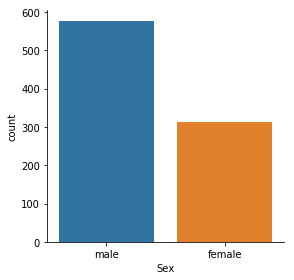

In [157]:
#For the gender
sns.factorplot('Sex',data=titanic_df,kind="count")


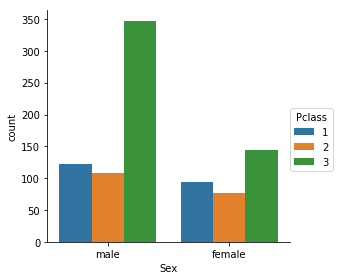

In [158]:
#To group accoring to class
sns.factorplot('Sex',data=titanic_df,kind='count',hue='Pclass')

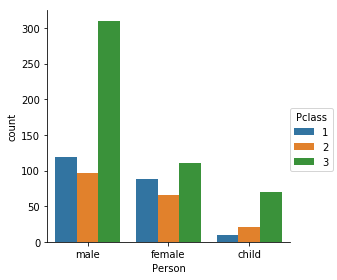

In [159]:
#to get male, female, children
def male_female_child(passenger):
    age, sex = passenger
    if(age<=16):
        return "child"
    else:
        return sex
#To get a new column
titanic_df["Person"] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)
titanic_df.head()
sns.factorplot('Person',data=titanic_df,kind="count",hue="Pclass")

29.69911764705882

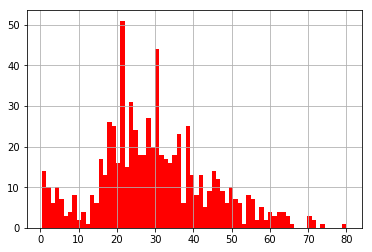

In [160]:
#For a histogram for distribution
titanic_df['Age'].hist(bins=70,color="red")
titanic_df['Age'].mean()

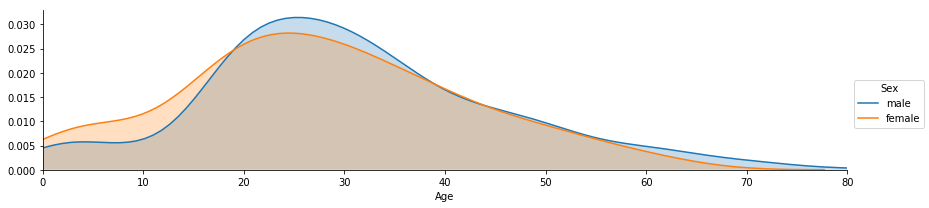

In [161]:
#Facet grid allows you to do multiple plots
fig = sns.FacetGrid(titanic_df,hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim=(0,oldest)) #setting the limit of x to 0 to oldest
fig.add_legend()

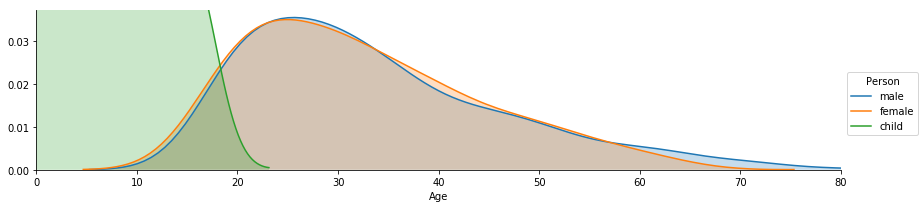

In [162]:
fig = sns.FacetGrid(titanic_df,hue="Person",aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim=(0,oldest)) #setting the limit of x to 0 to oldest
fig.add_legend()

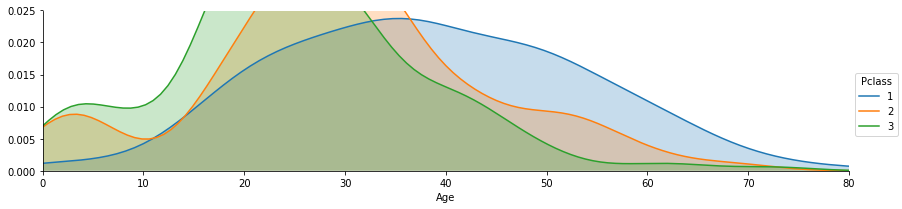

In [163]:
fig = sns.FacetGrid(titanic_df,hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim=(0,oldest)) #setting the limit of x to 0 to oldest
fig.add_legend()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 203
Data columns (total 1 columns):
Cabin    203 non-null object
dtypes: object(1)
memory usage: 13.2+ KB


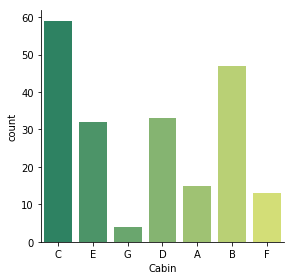

In [164]:
#Deck vs Passenger correlation
#Cabin column has null values
deck = titanic_df['Cabin'].dropna()#drops all null values
#deck.info()
levels = []
for level in deck: 
    levels.append(level[0])
    #To get just the deck alphabet
    
cabin_df = DataFrame(levels)
#titanic_df["alpha"] = levels
cabin_df.columns = ['Cabin']
    #palette is a colour plot 

    #to drop the T column 
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df,kind = "count",palette='summer')
cabin_df.info()

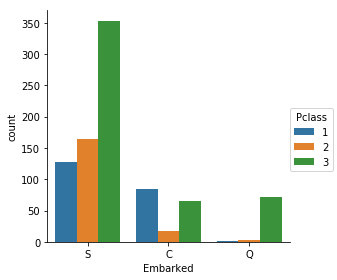

In [165]:
#To get where people came from 
sns.factorplot('Embarked',data=titanic_df,hue="Pclass",kind="count")

In [166]:
#Who was alone and who wasn't
def single_person(passenger):
    Parch, SibSp = passenger
    if(Parch==0 and SibSp==0):
        return 1
    else:
        return 0
titanic_df["Alone"] = titanic_df[["Parch","SibSp"]].apply(single_person,axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,1


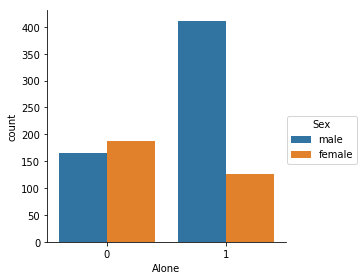

In [167]:
sns.factorplot("Alone",data=titanic_df,hue="Sex",kind="count")

In [168]:
titanic_df["Survivor"] = titanic_df.Survived.map({0:"no",1:"yes"})


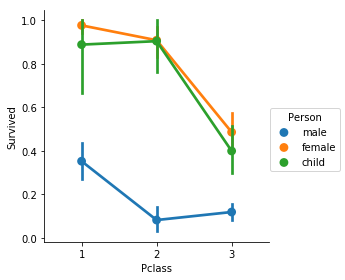

In [169]:
sns.factorplot("Pclass","Survived",hue="Person",data=titanic_df)
#This shows that being a male in any class is the worst chance of survival

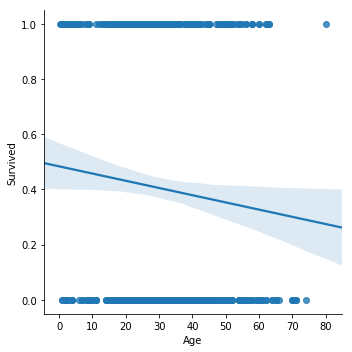

In [170]:
sns.lmplot("Age","Survived",data=titanic_df)

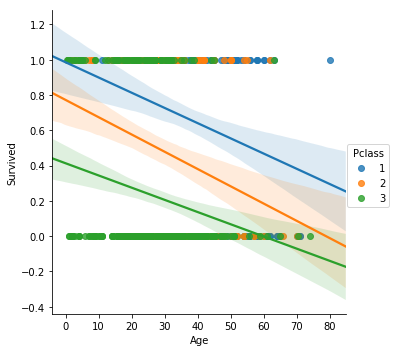

In [171]:
sns.lmplot("Age","Survived",hue="Pclass",data=titanic_df)

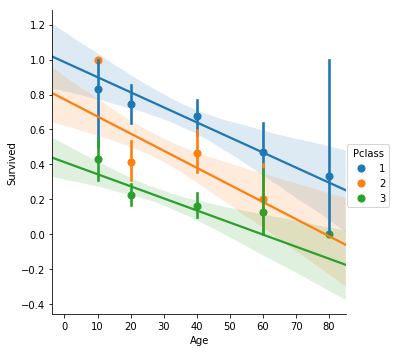

In [172]:
#Since there are too many ages 
generation = [10,20,40,60,80]
sns.lmplot("Age","Survived",hue="Pclass",data=titanic_df,x_bins=generation)

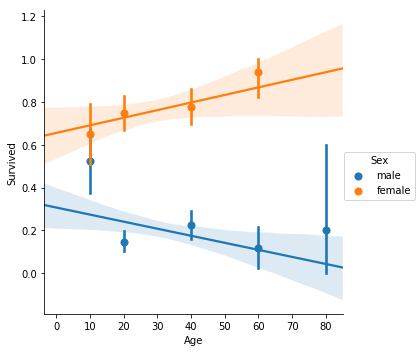

In [173]:

sns.lmplot("Age","Survived",hue="Sex",data=titanic_df,x_bins=generation)

In [174]:
#Did the deck have an effect with the survival rate 
#Being a male plus deck 
#Did having a family member help your survival  


C:\Users\lenovo\Anaconda2i\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


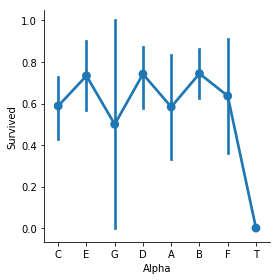

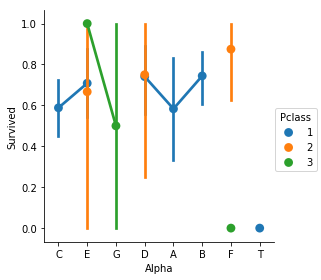

In [175]:
cabin_df = titanic_df.dropna()
#cabin_df.info()

def getCabinAlphabet(passenger):
    Cabin = passenger
    return Cabin[0][0]
cabin_df["Alpha"] = cabin_df[["Cabin"]].apply(getCabinAlphabet,axis=1)
#cabin_df.head()
sns.factorplot("Alpha","Survived",data=cabin_df)
sns.factorplot("Alpha","Survived",hue="Pclass",data=cabin_df)

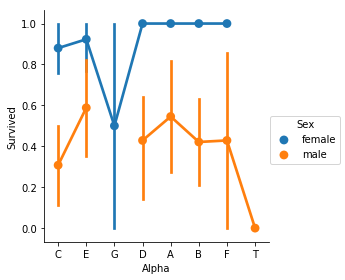

In [176]:
#For the male criteria
sns.factorplot("Alpha","Survived",hue="Sex",data=cabin_df)


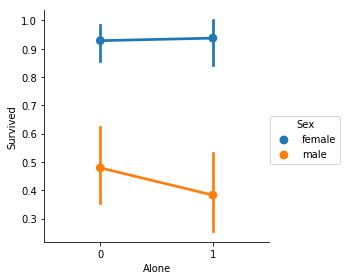

In [177]:
#Alone
sns.factorplot("Alone","Survived",hue="Sex",data=cabin_df)
#This shows that being alone when you're female does not matter

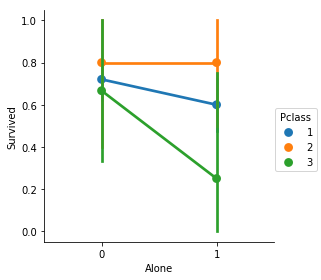

In [178]:
#Alone
sns.factorplot("Alone","Survived",hue="Pclass",data=cabin_df)

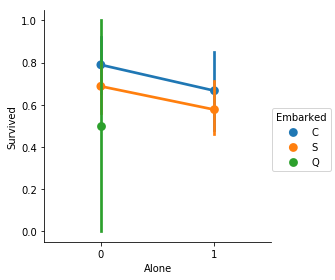

In [179]:
#Survival rate and where you're from 
sns.factorplot("Alone","Survived",hue="Embarked",data=cabin_df)